In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



**DATA WRANGLING/MUNGING-**
This process becomes part of your data pipeline. Here is a short list of typical data munging tasks, but there potentially are many more depending on the data:


Data sampling
Create new variables
Discretize quantitative variables
Date handling (e.g. changing dates stored as integers to R date objects)
Merge, order, reshape data sets
Other data manipulations such as changing categorical variables to multiple binary variables
Handling missing data
Feature scaling
Dimensionality reduction

https://towardsai.net/p/data-analysis/exploratory-data-analysis-in-python-ebdf643a33f6

https://www.kaggle.com/general/188478
https://statisticsbyjim.com/basics/outliers/
https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

https://www.data-to-viz.com/graph/density.html

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/allstate.csv')


In [ ]:
df.head


<bound method NDFrame.head of             id cat1 cat2 cat3  ...    cont12    cont13    cont14     loss
0            1    A    B    A  ...  0.594646  0.822493  0.714843  2213.18
1            2    A    B    A  ...  0.366307  0.611431  0.304496  1283.60
2            5    A    B    A  ...  0.373424  0.195709  0.774425  3005.09
3           10    B    B    A  ...  0.321570  0.605077  0.602642   939.85
4           11    A    B    A  ...  0.202213  0.246011  0.432606  2763.85
...        ...  ...  ...  ...  ...       ...       ...       ...      ...
188313  587620    A    B    A  ...  0.220003  0.333292  0.208216  1198.62
188314  587624    A    A    A  ...  0.301921  0.318646  0.305872  1108.34
188315  587630    A    B    A  ...  0.443374  0.339244  0.503888  5762.64
188316  587632    A    B    A  ...  0.852865  0.654753  0.721707  1562.87
188317  587633    B    A    A  ...  0.946432  0.810511  0.721460  4751.72

[188318 rows x 132 columns]>

In [ ]:
df.describe()


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
df.shape


(188318, 132)

In [ ]:
df.dtypes



id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [ ]:
#univariate analysis
for col in df.columns:
  print(df[col].value_counts())
  print(df[col].nunique())

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

In [ ]:
type(df.apply(lambda x: sum(x.isnull()),axis=0))
#null_val = [];
#for col in df.columns:
 #  null_val.append((sum(df[col].isnull())))


      

pandas.core.series.Series

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


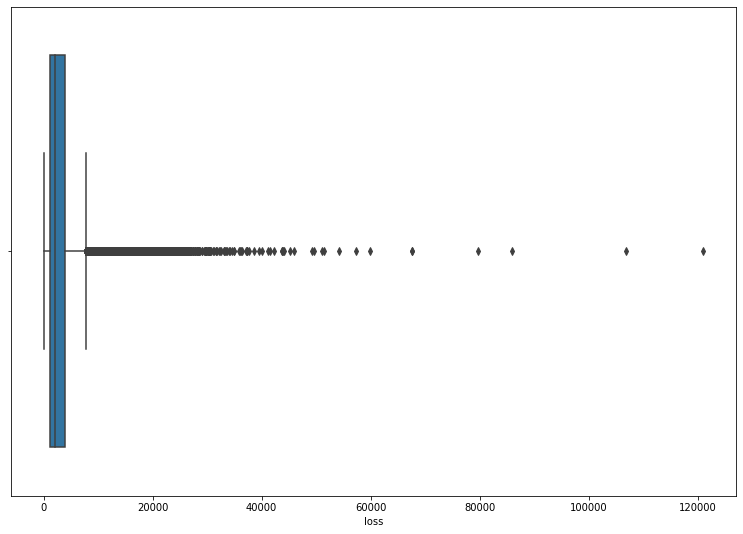

In [ ]:
plt.figure(figsize=(13,9))
sns.boxplot(df["loss"])

In [ ]:
#a= df.dtypes[df.columns]
#b = range(len(list(a[:])))
#for r in b:
 # if (a[r]) == 'object':
  #    df[r] = df[r].astype('str')

#for col in df.columns:
 # df[col] = df[col].astype('str')

#df['ltv'] = df['ltv'].astype('int64')

In [ ]:
#cols = df.columns
#for df[].hist(bins=25)

#to check the skewness of the data 
# Values close to 0 show less skew
print(df.skew())

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


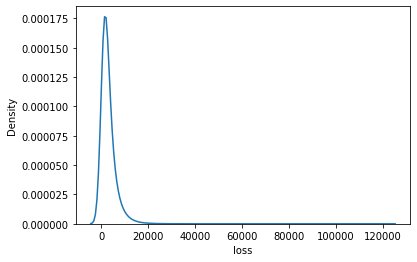

In [ ]:
#creating a desnity plot for loss to check and resolve skewness 
#we need to make it into a normal distribution

sns.kdeplot(df['loss'], bw=0.5)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


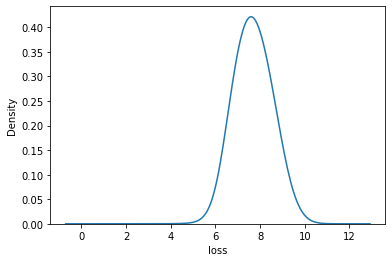

In [ ]:
#logarithmic transformation is said to be the option in right skewness

df["loss"] = np.log1p(df["loss"])

sns.kdeplot(df['loss'], bw=0.5)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


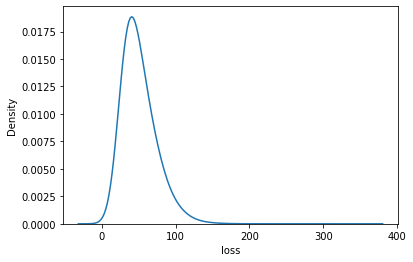

In [ ]:
#since logarthmic transfor is giving rise to negative skewness we shall do square root transform
df["loss"] = np.expm1(df["loss"])
df["loss"] = np.sqrt(df["loss"])

sns.kdeplot(df['loss'], bw=0.5)

In [ ]:
print(df.skew())

#even though square root transformation is giving us negative skewnesss but the value -0.06 is acceptable

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      1.265885
dtype: float64


A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable
.

It is a smoothed version of the histogram and is used in the same concept. 

So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. There are statistical model that are robust to outlier like a Tree-based models but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


In [ ]:
df = df.dropna(axis=0)
df.shape


(188318, 132)

In [ ]:
# calculate correlation matrix
data_corr = df.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.6

# List of pairs along with correlation above threshold
corr_list = []
cols = data_corr.shape[1]
#Search for the highly correlated pairs
for i in range(0,cols): #for 'size' features
    for j in range(i+1,cols): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],data_corr.columns[i],data_corr.columns[j]]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
  print ("%s and %s = %.2f" % (i,j,v))



cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61


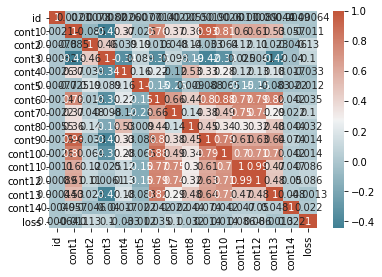

In [ ]:
# plot the heatmap
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
for v,i,j in s_corr_list:
    sns.pairplot(df, size=6, x_vars=i,y_vars=j )
    plt.show()

In [ ]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features and review number of unique values
cat = df.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

# merge with numeric data
num = df.drop(columns=cat.columns)
df2 = pd.concat([cat_encoded, num], axis=1)


Number of unique values per categorical feature:
 cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64


Loss Prediction Models

1. Linear Regression
2. LASSO
3. Ridge Regression
4. XG BOOST




In [ ]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2,test_size = 0.33)
y_train = train['loss']
y_test = test['loss']

X_train = train.drop(columns='loss')
X_test = test.drop(columns='loss')

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Variables cont4, cont5, cont6, cont 10 , cont 12, cont 14 are not significant as their p-values are high.

We can ignore cont5 a sit has high p-value 

We can remove cont12 as it is highly correlated with cont11

We can remove cont9 as it is highly correlated with cont1

We can remove cont6 and cont10 as both are highly correlated and have higb p- values.


cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.6

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

#model = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error
result = mean_absolute_error(y_test,y_pred)
print(result)


NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

#model2 = LinearRegression(fit_intercept=True, normalize=True,n_jobs=-1)


model2.fit(X_train.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']), y_train)

y_pred_features = model2.predict(X_test.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']))

from sklearn.metrics import mean_absolute_error
result_pred = mean_absolute_error(y_test,y_pred_features)
print(result_pred)

In [ ]:
result_pred

In [ ]:
from sklearn.linear_model import Ridge
model3 = Ridge(alpha=1.0)
model3.fit(X_train.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']), y_train)
y_pred_ridge = model3.predict(X_test.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']))
result_ridge = mean_absolute_error(y_test,y_pred_ridge)
print(result_ridge)

In [ ]:
from sklearn.linear_model import Lasso

model4 = Lasso(alpha=1.0)
model4.fit(X_train.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']), y_train)
y_pred_lasso = model4.predict(X_test.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']))
result_lasso = mean_absolute_error(y_test,y_pred_lasso)
print(result_lasso)

**Ensemble methods **
1. Random Forest
2. Boosting
3. XG BOOST
4. Light GBM

In [ ]:
from sklearn.ensemble import RandomForestRegressor

seed = 10
model5 = RandomForestRegressor(n_jobs=-1,n_estimators = 10,random_state=seed)
model5.fit(X_train.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']), y_train)
y_pred_rf = model5.predict(X_test.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']))
result_rf = mean_absolute_error(y_test,y_pred_rf)

In [ ]:
result_rf 


In [ ]:
from sklearn.ensemble import BaggingRegressor

seed = 10
model6 = BaggingRegressor(n_jobs=-1,random_state=seed)
model6.fit(X_train.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']), y_train)
y_pred_bag = model6.predict(X_test.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']))
result_bag = mean_absolute_error(y_test,y_pred_bag)

In [ ]:
from xgboost import XGBRegressor
seed=10


n_estimator = np.array([10,20,30,50,80,100,150,200])
for est in n_estimator:

    model7 = XGBRegressor(n_jobs=-1,n_estimators= n_estimator,random_state=seed)
    model7.fit(X_train.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']), y_train)
    y_pred_xgb = model7.predict(X_test.drop(columns = ['cont5', 'cont6', 'cont9', 'cont10', 'cont12']))
    result_xgb = mean_absolute_error(y_test,y_pred_xgb)

    print('MAE with' + n_estimator + 'is' + result_xgb)





